In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD, Adam
from keras.utils import np_utils
from ipywidgets import interact_manual
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [3]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(16, (5,5), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(8, (4,4), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(4, (5,5), padding='same'))
model.add(Activation('elu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))  #NN層
model.add(Activation('relu'))

model.add(Dense(16)) #NN層2
model.add(Activation('relu'))

model.add(Dense(10)) #輸出層
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         2056      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 8)         0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 4)           804       
__________

In [8]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(lr = 0.001), metrics = ['acc'])

In [9]:
model_1 = model.fit(x_train, y_train, batch_size=16, epochs=20, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 71s 1ms/step - loss: 0.2646 - acc: 0.9159 - val_loss: 0.1114 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0998 - acc: 0.9692 - val_loss: 0.0670 - val_acc: 0.9784
Epoch 3/20
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0751 - acc: 0.9769 - val_loss: 0.0587 - val_acc: 0.9802
Epoch 4/20
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0616 - acc: 0.9811 - val_loss: 0.0498 - val_acc: 0.9838
Epoch 5/20
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0529 - acc: 0.9834 - val_loss: 0.0601 - val_acc: 0.9803
Epoch 6/20
60000/60000 [==============================] - 75s 1ms/step - loss: 0.0479 - acc: 0.9849 - val_loss: 0.0452 - val_acc: 0.9854
Epoch 7/20
60000/60000 [==============================] - 76s 1ms/step - loss: 0

In [10]:
score = model.evaluate(x_test, y_test)
print('loss:', score[0])
print('正確率', score[1])

10000/10000 [==============================] - 3s 258us/step
loss: 0.04782138647302054
正確率 0.9875


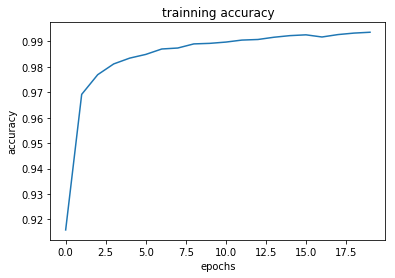

In [11]:
plt.plot(model_1.history["acc"])
plt.title("trainning accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.show()

In [12]:
predict = model.predict_classes(x_test)
def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print("神經網路判斷為:",predict[測試編號])

In [13]:
interact_manual(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Button(description='Run Interact', …